In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from IPython.display import display
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)


import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert (0,'../../_module1_/_functions_')
from Functions_EDA import *

In [3]:
path = '../dataset/supermarket_sales.csv'
retail = pd.read_csv(path, encoding='utf-8')

# 1. Clean Strings & Dtypes

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
from datetime import datetime, date, time, timezone
retail['Date'] = pd.to_datetime(retail['Date'])
retail['Time'] = pd.to_datetime(retail['Time'])

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [7]:
retail

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-06-29 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-06-29 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-06-29 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-06-29 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-06-29 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-06-29 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2024-06-29 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-06-29 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-06-29 15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [8]:
retail.columns.str.contains(' ')

array([ True, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False,  True,  True, False])

In [9]:
retail.columns = retail.columns.str.replace(' ', '_')

In [10]:
retail.columns.str.contains(' ')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [11]:
retail.columns = retail.columns.str.lower()

In [12]:
retail

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-06-29 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-06-29 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-06-29 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-06-29 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-06-29 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-06-29 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2024-06-29 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-06-29 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-06-29 15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [13]:
num_col = retail.select_dtypes(include=['int', 'float'])
num_col

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [14]:
cat_col = retail.select_dtypes(include=['object'])
cat_col

,invoice_id,branch,city,customer_type,gender,product_line,payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,Ewallet
...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,Cash


In [15]:
for columns in cat_col:
    print(f"Check for {columns}: {cat_col[columns].str.contains(' ').sum()}")

Check for invoice_id: 0
Check for branch: 0
Check for city: 0
Check for customer_type: 0
Check for gender: 0
Check for product_line: 1000
Check for payment: 311


In [16]:
retail.groupby(['product_line'])['product_line'].count()

product_line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: product_line, dtype: int64

In [17]:
retail.groupby(['payment'])['payment'].count()

payment
Cash           344
Credit card    311
Ewallet        345
Name: payment, dtype: int64

In [18]:
for columns in cat_col:
    print(f"Check for {columns}: {cat_col[columns].str.contains('-').sum()}")

Check for invoice_id: 1000
Check for branch: 0
Check for city: 0
Check for customer_type: 0
Check for gender: 0
Check for product_line: 0
Check for payment: 0


In [19]:
retail['invoice_length'] = retail.invoice_id.str.len()

In [20]:
print(f"Length of invoice code: {retail.invoice_length.unique()}")
print(f"Unique value of invoice code: {retail.invoice_length.nunique()}")

Length of invoice code: [11]
Unique value of invoice code: 1


# 2. Check Null Values

In [21]:
retail.isna().sum()

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5%                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
invoice_length             0
dtype: int64

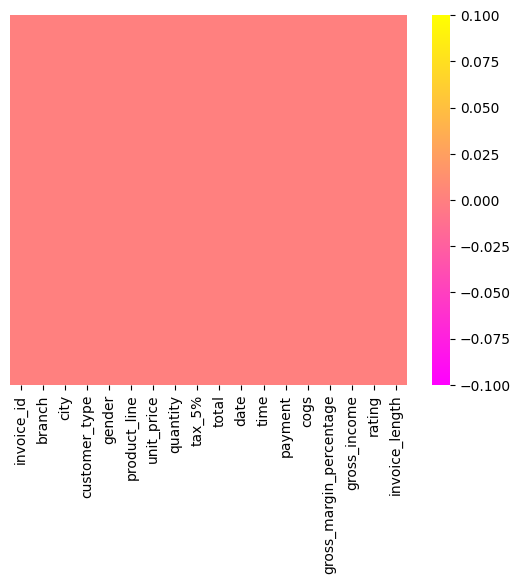

In [36]:
sns.heatmap(retail.isnull(), yticklabels=False, cbar=True, cmap='spring')
plt.show()

# 3. Check Duplicates

In [31]:
retail.duplicated().sum()

0

In [37]:
for column in retail.columns:
    duplicates_count = retail[column].duplicated().sum()
    print(f'Duplicates in {column}: {duplicates_count}')

Duplicates in invoice_id: 0
Duplicates in branch: 997
Duplicates in city: 997
Duplicates in customer_type: 998
Duplicates in gender: 998
Duplicates in product_line: 994
Duplicates in unit_price: 57
Duplicates in quantity: 990
Duplicates in tax_5%: 10
Duplicates in total: 10
Duplicates in date: 911
Duplicates in time: 494
Duplicates in payment: 997
Duplicates in cogs: 10
Duplicates in gross_margin_percentage: 999
Duplicates in gross_income: 10
Duplicates in rating: 939
Duplicates in invoice_length: 999


# 4. Check Outliers

In [14]:
def OutLiersBox(df,nameOfFeature):
    """
    Function to create a BoxPlot and visualise:
    - All Points in the Variable
    - Suspected Outliers in the variable

    """
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all', #define that we want to plot all points
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    
    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers', # define the suspected Outliers
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )


    data = [trace0,trace1]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    fig.show()    

In [16]:
for columns in retail:
    OutLiersBox(retail,columns)

**Outliers treatment to:**
- Tax 5%
- Total
- COGS
- Gross income

In [276]:
num_col

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [288]:
for column in num_col.columns:
    Q1,Q3 = np.percentile(num_col[column], [25,75])
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    print(f'lower limit of {column}: {lower_limit}')
    print(f'upper limit of {column}: {upper_limit}')
    print('---')

lower limit of unit_price: -34.715
upper limit of unit_price: 145.525
---
lower limit of quantity: -4.5
upper limit of quantity: 15.5
---
lower limit of tax_5%: -18.855687500000002
upper limit of tax_5%: 47.2258125
---
lower limit of total: -395.9694375
upper limit of total: 991.7420625
---
lower limit of cogs: -377.11375000000004
upper limit of cogs: 944.5162500000001
---
lower limit of gross_margin_percentage: 4.761904762
upper limit of gross_margin_percentage: 4.761904762
---
lower limit of gross_income: -18.855687500000002
upper limit of gross_income: 47.2258125
---
lower limit of rating: 1.0
upper limit of rating: 13.0
---


In [300]:
retail[retail['tax_5%'] > 47.2258125].index

Int64Index([166, 167, 350, 357, 422, 557, 699, 792, 996], dtype='int64')

In [299]:
retail[retail['total'] > 991.7420625].index

Int64Index([166, 167, 350, 357, 422, 557, 699, 792, 996], dtype='int64')

In [297]:
retail[retail['cogs'] > 944.5162500000001].index

Int64Index([166, 167, 350, 357, 422, 557, 699, 792, 996], dtype='int64')

In [296]:
retail[retail['gross_income'] > 47.2258125].index

Int64Index([166, 167, 350, 357, 422, 557, 699, 792, 996], dtype='int64')

In [304]:
retail_clean = outlier_treatment(retail, 'tax_5%')

Shape of the raw data: (1000, 18)
..................
Shape of the cleaned data: (991, 18)


In [305]:
for columns in retail_clean:
    OutLiersBox(retail_clean,columns)

In [306]:
retail_clean

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,invoice_length
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-06-26 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,11
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-06-26 10:29:00,Cash,76.40,4.761905,3.8200,9.6,11
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-06-26 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,11
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-06-26 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,11
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-06-26 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,2024-06-26 11:40:00,Ewallet,60.95,4.761905,3.0475,5.9,11
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-06-26 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,11
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-06-26 13:22:00,Cash,31.84,4.761905,1.5920,7.7,11
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-06-26 15:33:00,Cash,65.82,4.761905,3.2910,4.1,11


In [309]:
path2 = 'supermarket_clean.csv'
retail_clean.to_csv(path2, index=False)